In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, learning_curve
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display information
print("Name: Jayasinghe K.J.M.U.G.S.E.")
print("Student ID: 2021/E/075")
print("Course: EC9630 – Machine Learning")
print("Lab 03: Nonlinear Models")

In [ ]:
# Download the dataset from UCI Repository
# Dataset link: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

# Load the dataset
file_path = 'diabetes_binary_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Get information about the dataset
print("\nDataset Information:")
print(data.info())

# Get statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Explore the relationship between features and target
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Analyze some important features
features_to_analyze = ['BMI', 'PhysHlth', 'GenHlth', 'Age', 'HeartDiseaseorAttack', 'HighBP', 'HighChol']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_analyze):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Diabetes_binary', y=feature, data=data)
    plt.title(f'{feature} vs Diabetes')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Divide the dataset into Input (X) and Target (y)
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Identify categorical and numerical features
# Most features in this dataset are numerical or binary
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Numerical features: {numerical_features}")

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Create training, validation, and test datasets (70%, 20%, 10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)  # 0.22 of 90% is ~20% of total

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Implement RBF kernel using SVM with RBF kernel
print("\n1. Radial Basis Function (RBF) Model")

# Create a pipeline with preprocessing and RBF SVM
rbf_model = SVC(kernel='rbf', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

# Perform grid search for hyperparameter tuning
print("Performing hyperparameter tuning for RBF model...")
grid_search = GridSearchCV(rbf_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rbf_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Evaluate on validation set
y_val_pred = best_rbf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rbf_model, X_train, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for RBF Kernel')
plt.xlabel('Training examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Implement Perceptron model
print("\n2. Perceptron Model")

# Create a Perceptron model
perceptron_model = Perceptron(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000],
    'eta0': [0.1, 0.5, 1.0]
}

# Perform grid search for hyperparameter tuning
print("Performing hyperparameter tuning for Perceptron model...")
grid_search = GridSearchCV(perceptron_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_perceptron_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Evaluate on validation set
y_val_pred = best_perceptron_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_perceptron_model, X_train, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for Perceptron')
plt.xlabel('Training examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Implement Multi-Layer Perceptron (MLP) model
print("\n3. Multi-Layer Perceptron (MLP) Model")

# Create an MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Define hyperparameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Perform grid search for hyperparameter tuning
print("Performing hyperparameter tuning for MLP model...")
grid_search = GridSearchCV(mlp_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_mlp_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Evaluate on validation set
y_val_pred = best_mlp_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_mlp_model, X_train, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for MLP')
plt.xlabel('Training examples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Plot loss curve for MLP
plt.figure(figsize=(10, 6))
plt.plot(best_mlp_model.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.show()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


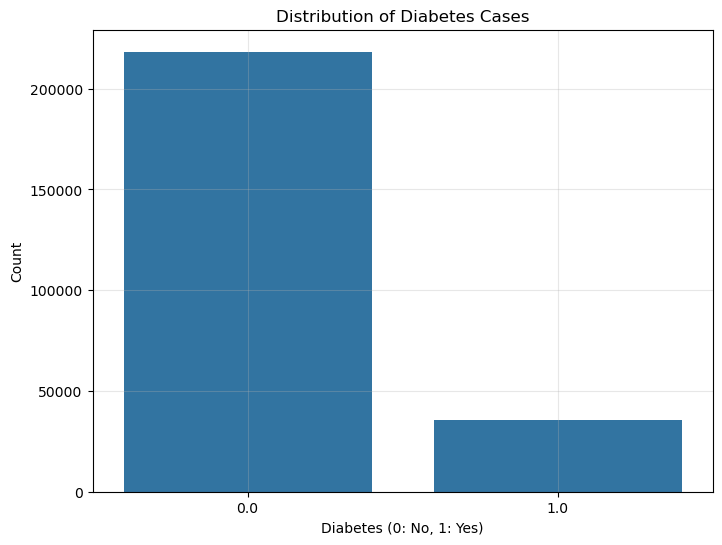

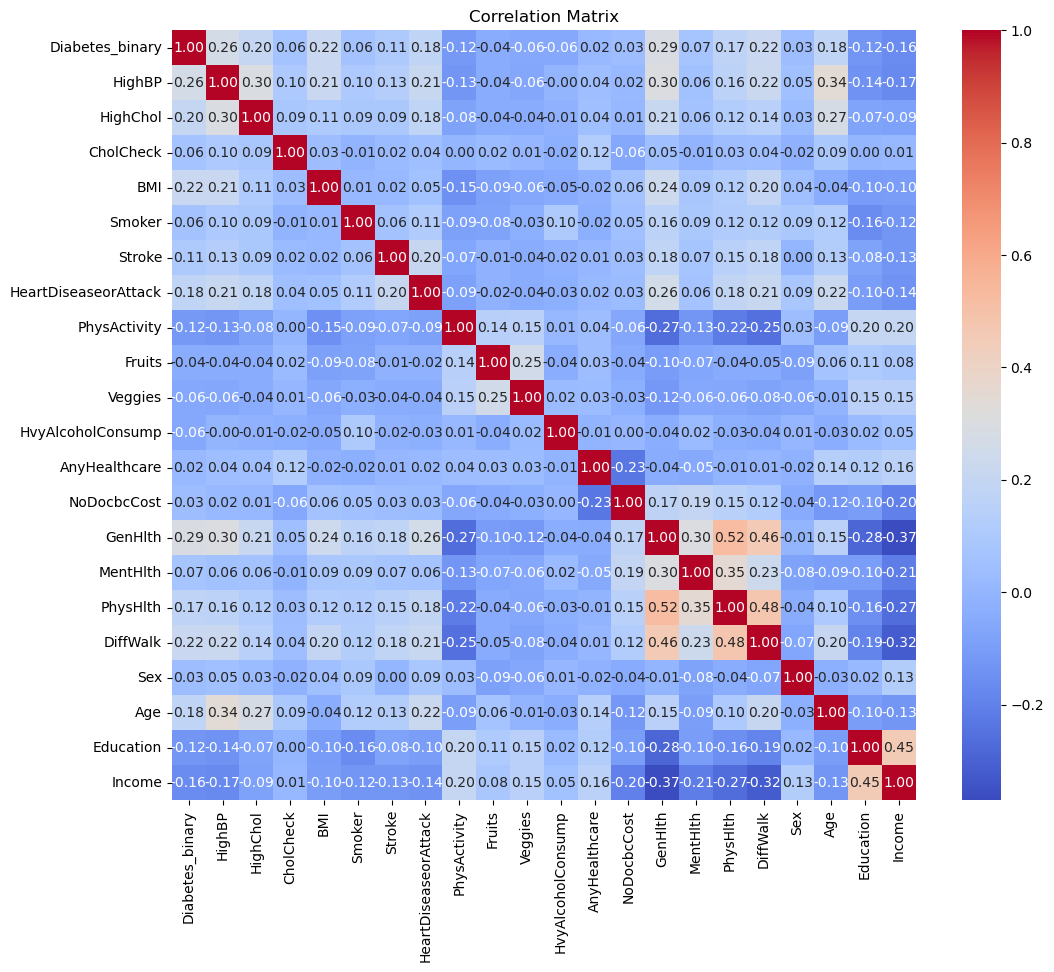

In [ ]:
# Evaluate all models on the test set
print("\nModel Evaluation on Test Data:")

# Models to evaluate
models = {
    'RBF SVM': best_rbf_model,
    'Perceptron': best_perceptron_model,
    'MLP': best_mlp_model
}

# Metrics to calculate
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model'] + list(metrics.keys()))

# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    model_metrics

In [ ]:
# Divide the dataset into Input (X) and Target (y)
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Identify categorical and numerical features
# For this dataset, most features are categorical (binary or ordinal)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")


Categorical features: []
Numerical features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, learning_curve

In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

In [ ]:
# Create training, validation, and test datasets (70%, 20%, 10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.22, random_state=42)  # 0.22 of 90% is ~20% of total

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

Training set size: 178083 samples
Validation set size: 50229 samples
Test set size: 25368 samples


In [ ]:
# Create a pipeline with preprocessing and RBF SVM
rbf_model = SVC(kernel='rbf', random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

# Perform grid search for hyperparameter tuning
print("Performing hyperparameter tuning for RBF model...")
grid_search = GridSearchCV(rbf_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rbf_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Performing hyperparameter tuning for RBF model...


In [ ]:
# Evaluate on validation set
y_val_pred = best_rbf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")

In [ ]:
# Create a Perceptron model
perceptron_model = Perceptron(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 5000],
    'eta0': [0.1, 0.5, 1.0]
}